In [1]:
import keras
import tensorflow as tf
import pandas as pd

/home/kullu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [30]:
print("x_train shape :",x_train.shape," y_train shape :",y_train.shape)

x_train shape : (60000, 28, 28)  y_train shape : (60000,)


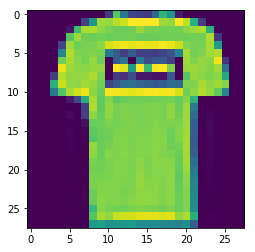

In [31]:
plt.imshow(x_train[1])

In [32]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
# x_train = x_train.reshape(-1,28,28,1)
# x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [35]:
# x_valid = x_train[48000:]
# y_valid = y_train[48000:]
# x_train = x_train[:48000]
# y_train = y_train[:48000]

In [36]:
model = tf.keras.Sequential()

#first convolution and pooling layers
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',data_format="channels_last",input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

#second convolution and pooling layers
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

#third convolution and pooling layers
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.5))

#flattening out and other stuff
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [46]:
len(model.get_weights()[1])

32

In [47]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [48]:
model.fit(x_train,y_train,batch_size=100,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.4297 - acc: 0.8447 - val_loss: 0.3238 - val_acc: 0.8818
Epoch 2/10
48000/48000 [==============================] - 100s 2ms/step - loss: 0.3525 - acc: 0.8694 - val_loss: 0.3017 - val_acc: 0.8914
Epoch 3/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3302 - acc: 0.8766 - val_loss: 0.2847 - val_acc: 0.8956
Epoch 4/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3157 - acc: 0.8838 - val_loss: 0.2779 - val_acc: 0.8982
Epoch 5/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3049 - acc: 0.8868 - val_loss: 0.2663 - val_acc: 0.9027
Epoch 6/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2947 - acc: 0.8915 - val_loss: 0.2608 - val_acc: 0.9040
Epoch 7/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2882 - acc: 0.8939 - val_loss: 0.2556 - val_ac

In [49]:
score = model.evaluate(x_test, y_test, verbose=0)

In [50]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26432312656641005
Test accuracy: 0.9028
